# 7.6 Capstone Two: Data Wrangling

Step 1: Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file


In [2]:
insurance = pd.read_csv('data/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can observe:

1) There are 7 columns in the data. 

2) There are 1338 rows without any null value exist. 

3) The range of age is from 18 to 64 which is in reasonable range. 

4) The range of bmi and charges are in possible range in this preliminary stage. 

5) The range of children is from 0 to 5 which is also in reasonable range.

6) Sex, smoker and region can be changed to 'category' type as they have limited possible outcomes. 

Step 2: Check for repetition data

In [6]:
(insurance['charges']).value_counts().head()

1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
Name: charges, dtype: int64

In [7]:
print(insurance[insurance['charges'] == 1639.56310])

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


As the charges are upto 4 decimal places, it has very little chance that 2 people would have the same charges. By further observation, the 195th and 581th columns are exactly the same. One of them shall be dropped.

In [8]:
#195 and 581 are repeating data and we want to drop one of them
insurance =insurance.drop_duplicates()


In [9]:
#Check for only one row is dropped
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
insurance.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#Change data column of sex,region and smoker to category
insurance['sex'] = insurance['sex'].astype("category")
insurance['region'] = insurance['region'].astype("category")
insurance['smoker'] = insurance['smoker'].astype("category")



In [12]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.5 KB


In [14]:
#Check for possible value in all categories
print(insurance['sex'].unique())

[female, male]
Categories (2, object): [female, male]


In [15]:
print(insurance['region'].unique())

[southwest, southeast, northwest, northeast]
Categories (4, object): [southwest, southeast, northwest, northeast]


In [16]:
print(insurance['smoker'].unique())

[yes, no]
Categories (2, object): [yes, no]


In [17]:
#round off bmi and charges into 2 decimal places
insurance['charges'] = round(insurance['charges'],2)
insurance['bmi'] = round(insurance['bmi'],2)
print(insurance.head())

   age     sex    bmi  children smoker     region   charges
0   19  female  27.90         0    yes  southwest  16884.92
1   18    male  33.77         1     no  southeast   1725.55
2   28    male  33.00         3     no  southeast   4449.46
3   33    male  22.70         0     no  northwest  21984.47
4   32    male  28.88         0     no  northwest   3866.86


Step 3: Explore the distribution of each attributes 

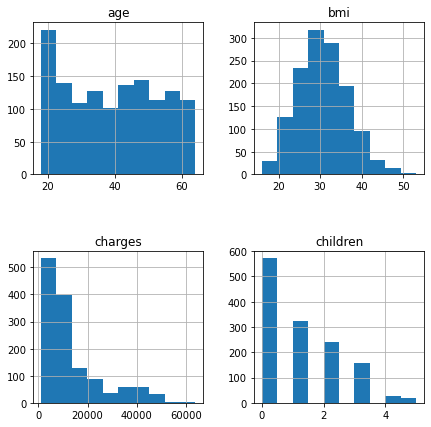

In [18]:
#Explore feature distibution
insurance.hist(figsize=(7,7 ))
plt.subplots_adjust(hspace=0.5)

We can observe:

1) We have data of age from 18 to 64 and 100-200 data in each age level. There are more than 200 data are from age around 20

2) The bmi has a shape similar with normal distribution.

3) The charges columns has a right tails which indicate the medical cost of most people is below      15000.

4) When the number of children increases, the number of counts dereases.



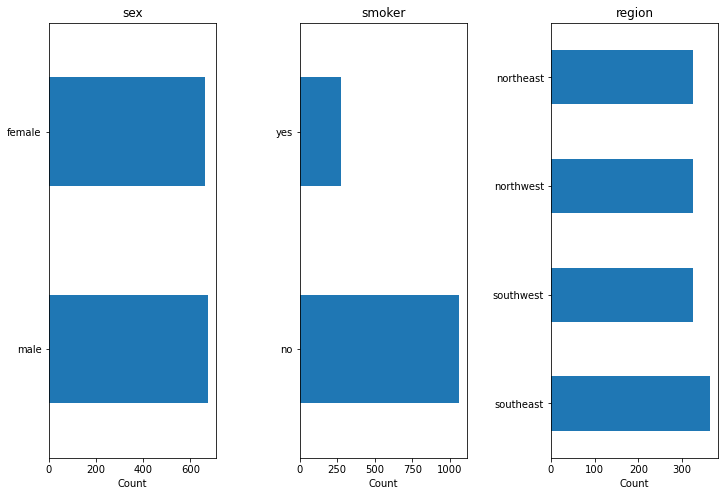

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

insurance.sex.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('sex')
ax[0].set_xlabel('Count')

insurance.region.value_counts().plot(kind='barh', ax=ax[2])
ax[2].set_title('region')
ax[2].set_xlabel('Count')

insurance.smoker.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('smoker')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace= 0.5);




We can observe:

1) The no. of male and female are similar and male is slightly more than female.

2) Majority of interviewees are not smoker and about 250 of 1337 interviwees are smoker.

3) The no. of interviewees from each region is balance except there are slightly more people come from SE than other 3 regions.

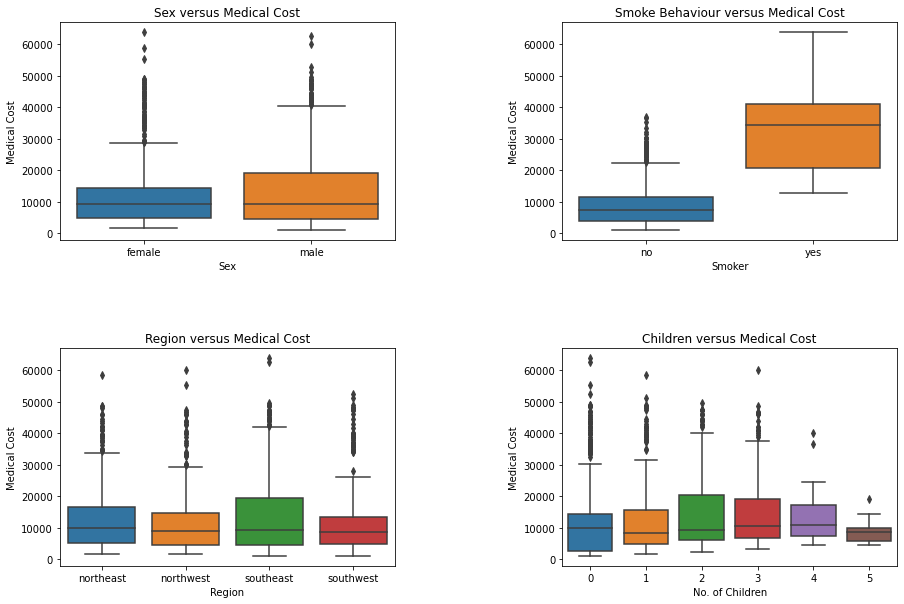

In [21]:
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.boxplot(x='sex' , y='charges', data=insurance,ax=ax[0,0]).set(title='Sex versus Medical Cost', xlabel='Sex', ylabel='Medical Cost')

sns.boxplot(x='smoker' , y='charges', data=insurance,ax=ax[0,1]).set(title='Smoke Behaviour versus Medical Cost', xlabel='Smoker', ylabel='Medical Cost')
sns.boxplot(x='region' , y='charges', data=insurance,ax=ax[1,0]).set(title='Region versus Medical Cost', xlabel='Region', ylabel='Medical Cost')
sns.boxplot(x='children' , y='charges', data=insurance,ax=ax[1,1]).set(title='Children versus Medical Cost', xlabel='No. of Children', ylabel='Medical Cost')


plt.subplots_adjust(wspace= 0.5);
plt.subplots_adjust(hspace= 0.5);


We can observe:

1) Only smoking behaviour shows an obvious difference in medical costs.

2) Outliers observsed but they are still in possible range.

Step 4: File Saving

In [22]:
datapath = 'data'
save_file(insurance, 'insurance_r1.csv',datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data\insurance_r1.csv"


Step 5: Prepare for linear regression

In [23]:
insurance_1 = insurance
insurance_1['sex'] = insurance_1['sex'].map({'female': '0', 'male': '1'})

In [24]:
insurance_1['SW'] = insurance_1['region'].map({'southwest': '1', 'southeast': '0', 'northwest' : '0','northeast' : '0'})
insurance_1['SE'] = insurance_1['region'].map({'southwest': '0', 'southeast': '1', 'northwest' : '0','northeast' : '0'})
insurance_1['NW'] = insurance_1['region'].map({'southwest': '0', 'southeast': '0', 'northwest' : '1','northeast' : '0'})
insurance_1['NE'] = insurance_1['region'].map({'southwest': '0', 'southeast': '0', 'northwest' : '0','northeast' : '1'})
insurance_1 = insurance_1.drop(['region'], axis=1)
insurance_1['SW'] = insurance_1['SW'].astype("category")
insurance_1['SE'] = insurance_1['SE'].astype("category")
insurance_1['NW'] = insurance_1['NW'].astype("category")
insurance_1['NE'] = insurance_1['NE'].astype("category")

In [25]:
datapath = 'data'
save_file(insurance_1, 'insurance_regression.csv',datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data\insurance_regression.csv"


In [26]:
insurance_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   charges   1337 non-null   float64 
 6   SW        1337 non-null   category
 7   SE        1337 non-null   category
 8   NW        1337 non-null   category
 9   NE        1337 non-null   category
dtypes: category(6), float64(2), int64(2)
memory usage: 100.6 KB


In [27]:
insurance_1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663628,1.095737,13279.121503
std,14.044333,6.100233,1.205571,12110.359677
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.290000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.130000,5.000000,63770.430000


In this step:

1) female changed to 0 and male changed to 1

2) 4 columns of dummy variables have been created to indicate the location of interviewees

3) The original 

In a conclusion, we performed preliminary checking the data including checking the repeated data and investigate the range and distribution of each attribute. Also, we created two csv fils, the first csv contain tidied version of data and the second csv contains same information of the first csv but formatted for linear regression. 